 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><ul class="toc-item"><ul class="toc-item"><ul class="toc-item"><li><span><a href="http://localhost:8889/notebooks/FindKeyRiverScalingMonthly.ipynb#fig,-ax-=-plt.subplots(1,-1,-figsize=(18,-4))" data-toc-modified-id="fig,-ax-=-plt.subplots(1,-1,-figsize=(18,-4))-0.0.0.1"><span class="toc-item-num">0.0.0.1&nbsp;&nbsp;</span>fig, ax = plt.subplots(1, 1, figsize=(18, 4))</a></span></li></ul></ul></ul></ul></div>

This is monthly, previous notebook was looking at yearly

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

%matplotlib inline

In [2]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days_in_month = (31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31)

Note, I call the rivers Squamish but I am doing all of them with this notebook

In [680]:
squamish1 = pd.read_csv('Theodosia_Scotty_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
squamish2 = pd.read_csv('Theodosia_Bypass_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
squamish3 = pd.read_csv('Theodosia_Diversion_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
watershed = 'Toba'

In [681]:
for squamish in [squamish1, squamish2, squamish3]:
    length = squamish.year.shape[0]
    dates = []
    for i in range(length):
        dates.append(datetime.datetime(squamish.year[i], squamish.month[i], squamish.day[i]))
    squamish['dates'] = dates
squamish1 = squamish1.set_index('dates')
squamish2 = squamish2.set_index('dates')
squamish3 = squamish3.set_index('dates')
squamish = squamish1 + squamish3 - squamish2

In [708]:
secondary = pd.read_csv('Homathko_Mouth_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
usesecondary = False

In [709]:
squamish = pd.read_csv('Englishman_flow', header=None, sep='\s+', index_col=False,
                      names=['year', 'month', 'day', 'flow'])
watershed = 'EVI_S'

In [710]:
length = squamish.year.shape[0]
dates = []
for i in range(length):
    dates.append(datetime.datetime(squamish.year[i], squamish.month[i], squamish.day[i]))
squamish['dates'] = dates
squamish = squamish.set_index('dates')
print(squamish[:5])

            year  month  day  flow
dates                             
1913-02-15  1913      2   15  10.3
1913-02-17  1913      2   17  75.3
1913-02-18  1913      2   18  43.0
1913-02-19  1913      2   19  26.5
1913-02-20  1913      2   20  19.3


In [711]:
if usesecondary:
    length = secondary.year.shape[0]
    dates = []
    for i in range(length):
        dates.append(datetime.datetime(secondary.year[i], secondary.month[i], secondary.day[i]))
    secondary['dates'] = dates
    secondary = secondary.set_index('dates')
secondary[:5]

,year,month,day,flow
0,1957,2,1,37.1
1,1957,2,2,37.1
2,1957,2,3,37.1
3,1957,2,4,37.1
4,1957,2,5,37.1


In [712]:
diffy = squamish.index[1:] - squamish.index[:-1]
diffy_data = pd.DataFrame({'date': squamish.index[1:], 
                           'year' : squamish.year[1:],
                        'gap' : diffy[:]})
diffy_data = diffy_data.set_index('date')

if usesecondary:
    diffy2 = secondary.index[1:] - secondary.index[:-1]
    diffy2_data = pd.DataFrame({'date' : secondary.index[1:],
                              'year' : secondary.year[1:],
                              'gap' : diffy2[:]})
    diffy2_data = diffy2_data.set_index('date')

In [713]:
goodyears = []
minyear = 1970
for year in range(minyear, 2010):
    maxgap = diffy_data.gap[diffy_data.year == year].max()
    if usesecondary and maxgap == maxgap:
        maxgap = max(maxgap, diffy2_data.gap[diffy2_data.year == year].max())
    if maxgap == datetime.datetime(1980, 1, 2) - datetime.datetime(1980, 1, 1):
        if squamish.flow[squamish.year == year].shape[0] >= 365:
            if not np.isnan(squamish.flow[squamish.year == year].mean(skipna=False)):
                if usesecondary:
                    if secondary.flow[secondary.year == year].shape[0] >= 365:
                        if not np.isnan(secondary.flow[secondary.year == year].mean(skipna=False)):
                            goodyears.append(year)
                else:
                    goodyears.append(year)

In [714]:
print (goodyears)

[1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


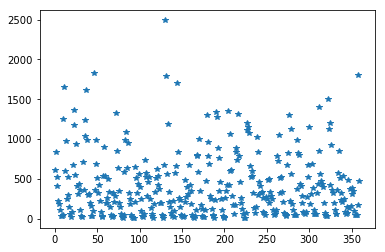

In [715]:
squamish_flux = np.zeros(12*len(goodyears))
squamish_daily = np.zeros(365*len(goodyears))
for i, year in enumerate(goodyears):
    for j, month in enumerate(months):
        squamish_flux[i*12 + j] = (squamish.flow[(squamish.year == year) & (squamish.month==j+1)].mean() * 
                                   days_in_month[j])
        if squamish_flux[i*12 + j] != squamish_flux[i*12 + j]:
            print (year, month)
    squamish_daily[i*365: (i+1)*365] = squamish.flow[(squamish.year == year)][0:365]
plt.plot(squamish_flux, '*');

if usesecondary:
    secondary_flux = np.zeros(12*len(goodyears))
    secondary_daily = np.zeros(365*len(goodyears))
    for i, year in enumerate(goodyears):
        for j, month in enumerate(months):
            secondary_flux[i*12 + j] = (secondary.flow[(secondary.year == year) & (secondary.month==j+1)].mean() * 
                                   days_in_month[j])
            if secondary_flux[i*12 + j] != secondary_flux[i*12 + j]:
                print (year, month, ' secondary', secondary_flux[i*12+j])
        secondary_daily[i*365: (i+1)*365] = secondary.flow[(secondary.year == year)][0:365]
    plt.plot(secondary_flux, '+');

/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app
/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/sallen/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


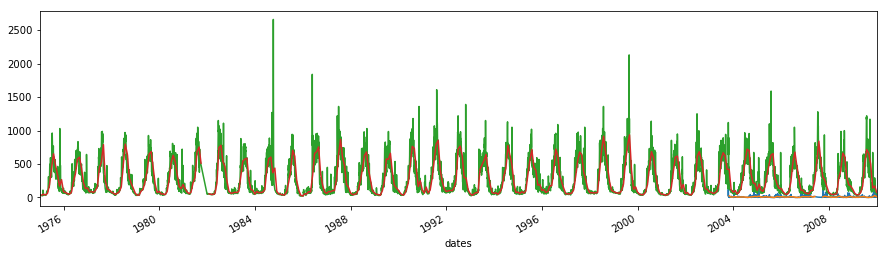

In [687]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
squamish[squamish.year < 2010][squamish.year > 1974]['flow'].plot(ax=ax)
squamish[squamish.year < 2010][squamish.year > 1974]['flow'].resample(
    'm').mean().plot(ax=ax)
if usesecondary:
    secondary[secondary.year < 2010][secondary.year > 1974]['flow'].plot(ax=ax)
    secondary[secondary.year < 2010][secondary.year > 1974]['flow'].resample(
    'm').mean().plot(ax=ax)

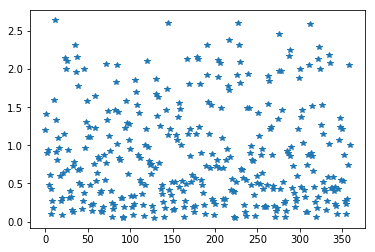

In [716]:
howe_flux = np.zeros(12*len(goodyears))
for i, year in enumerate(goodyears):
    for j, month in enumerate(months):
        morrison = pd.read_excel('Copy of Flow_Mon_X_Year.xlsx', sheetname=str(year),
                                names=['Water Year', 'Unnamed', 'area', 'total', 'Jan',
                                                   'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
                                                   'Oct', 'Nov', 'Dec'])
        howe_flux[i*12 +j] = morrison[month][morrison['Water Year'] == watershed]
plt.plot(howe_flux, '*');

147222.996419
312.974483632
24.6047828461
312.974483632
8.49992009272


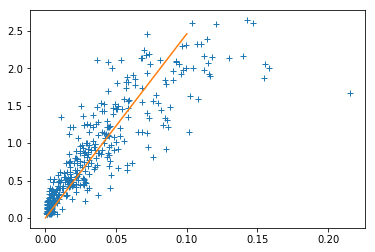

In [717]:
plt.plot(squamish_flux*86400/1e9, howe_flux, '+');
print (squamish_flux.sum())
print (howe_flux.sum())
slope = howe_flux.sum()/(squamish_flux.sum()*86400/1e9)
print (slope)
plt.plot([0, 0.1], [0, 0.1*slope])
weight_prediction = slope*(squamish_flux*86400/1e9)
print (weight_prediction.sum())
print (np.sqrt(((weight_prediction-howe_flux)**2).sum()))

if usesecondary:
    plt.plot(secondary_flux*86400/1e9, howe_flux, '+');
    slope2 = howe_flux.sum()/(secondary_flux.sum()*86400/1e9)
    plt.plot([0, 2], [0, 2*slope2])
    weight_prediction2 = slope2*(secondary_flux*86400/1e9)
    print (np.sqrt(((weight_prediction2-howe_flux)**2).sum()))
    print (np.sqrt(((weight_prediction2-weight_prediction)**2).sum()))


312.974483632
312.974483632
[ 16.12953612] 0.299460292281


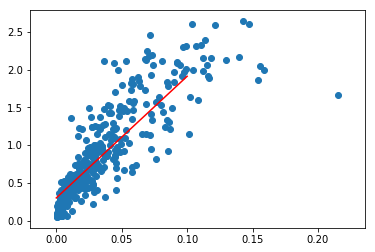

In [718]:
model = LinearRegression(fit_intercept=True)

model.fit(squamish_flux[:, np.newaxis]*86400/1e9, howe_flux)

xfit = np.linspace(0, 0.1, 10)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(squamish_flux*86400/1e9, howe_flux)
plt.plot(xfit, yfit, 'r');
print (model.predict(squamish_flux[:, np.newaxis]*86400/1e9).sum())
print (howe_flux.sum())
print (model.coef_, model.intercept_)
linear_slope = model.coef_
linear_intercept = model.intercept_
linear_predictions =model.predict(squamish_flux[:, np.newaxis]*86400/1e9)

0.251409911818
259.958292233


array([ 20.43686519])

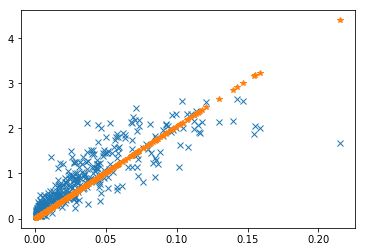

In [719]:
X = squamish_flux*86400/1e9
y = howe_flux

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

plt.plot(X, y, 'x')
plt.plot(X, predictions,'*')
# Print out the statistics
print ((np.sqrt(((predictions-y)**2).sum()))/len(goodyears))
print(predictions.sum())
model.params

0.21346351552
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     987.7
Date:                Mon, 22 Apr 2019   Prob (F-statistic):          5.69e-105
Time:                        15:28:43   Log-Likelihood:                -119.81
No. Observations:                 360   AIC:                             243.6
Df Residuals:                     358   BIC:                             251.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2995      0.025     1

array([  0.29946029,  16.12953612])

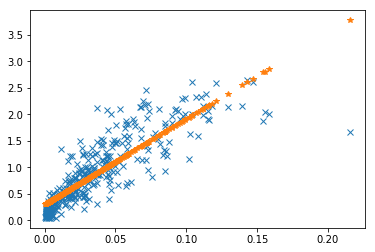

In [720]:
x = squamish_flux*86400/1e9
X = x 
X = sm.add_constant(X)
y = howe_flux

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions2 = model.predict(X)
plt.plot(x, y, 'x')
plt.plot(x, predictions2,'*')
# Print out the statistics
print ((np.sqrt(((predictions2-y)**2).sum()))/len(goodyears))
print(model.summary())
model.params

0.232 0.185551677812
0.233 0.185551649595
0.234 0.185551649959

In [721]:
x = squamish_flux*86400/1e9
x2 = secondary_flux*86400/1e9
X = np.column_stack((x, x2))
#X = sm.add_constant(X)
y = howe_flux

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions4 = model.predict(X)
plt.plot(x, y, 'x')
plt.plot(x, predictions4,'*')
# Print out the statistics
print ((np.sqrt(((predictions4-y)**2).sum()))/len(goodyears))
print(model.summary())
print (predictions4.sum())
print (howe_flux.sum())
upit = howe_flux.sum()/predictions4.sum()
coeffs = model.params
coeffs

ValueError: all the input array dimensions except for the concatenation axis must match exactly

0.06 0.188429733902
0.07 0.187142663881
0.077 0.186869763956
0.078 0.186862723836
0.079 0.186862648103
0.08  0.186869233174
0.083 0.186926112261
0.085 0.186992337482
0.09 0.187243342386
0.095 0.187596497167
0.1  0.188030978995
0.12 0.190287497497
0.14 0.192933188799
0.15 0.194294037563
0.16 0.195648948532
0.17 0.196983887632
0.18 0.19828960825
0.19 0.199560203113
0.20 0.200792103727
0.21 0.20198338205
0.22 0.20313325895

ValueError: x and y must have same first dimension, but have shapes (360,) and (48,)

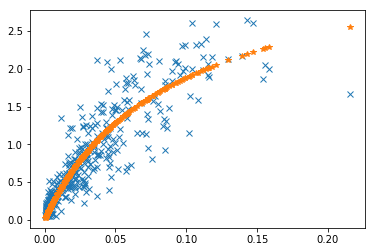

In [722]:
x = squamish_flux*86400/1e9
X = x/(0.079+x)
#X = sm.add_constant(X)
y = howe_flux - x

# Fit and make the predictions by the model
model = sm.OLS(y, X).fit()
predictions5 = model.predict(X)
plt.plot(x, y+x, 'x')
plt.plot(x, predictions5+x,'*')
plt.plot(x, predictions4, 'o')
# Print out the statistics
print ((np.sqrt(((predictions5-y)**2).sum()))/len(goodyears))
print(model.summary())
model.params

0.37754194315
0.834040046503 1


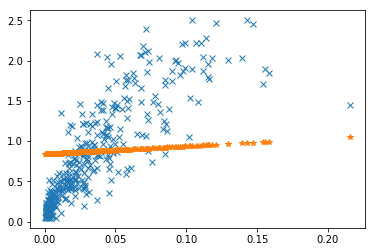

In [723]:
X = squamish_flux*86400/1e9
b = howe_flux.mean() - X.mean()
predictions3 = b + X

# Fit and make the predictions by the model
plt.plot(x, y, 'x')
plt.plot(x, predictions3,'*')
# Print out the statistics
print ((np.sqrt(((predictions3-y)**2).sum()))/len(goodyears))
print (b, '1')

In [724]:
k = int(howe_flux.shape[0]/10)
idx = np.argpartition(howe_flux, k)
idz = np.argpartition(howe_flux, -k)
hf_low = howe_flux[idx[:k]].sum()
hf_high = howe_flux[idz[-k:]].sum()
idx = np.argpartition(weight_prediction, k)
idz = np.argpartition(weight_prediction, -k)
wp_low = weight_prediction[idx[:k]].sum()
wp_high = weight_prediction[idz[-k:]].sum()
idx = np.argpartition(linear_predictions, k)
idz = np.argpartition(linear_predictions, -k)
lp_low = linear_predictions[idx[:k]].sum()
lp_high = linear_predictions[idz[-k:]].sum()
# alpha * wp + (1 - alpha) * lp) = hf
# alpha (wp-lp) + lp = hf
alpha_low = (hf_low - lp_low)/(wp_low - lp_low)
alpha_high = (hf_high - lp_high)/(wp_high - lp_high)
print (alpha_low, alpha_high)
alpha = 0.5 * (alpha_low+alpha_high)
print (alpha)
mixed_predictions = alpha*weight_prediction + (1-alpha)*linear_predictions

0.801461359328 0.0693378414462
0.435399600387


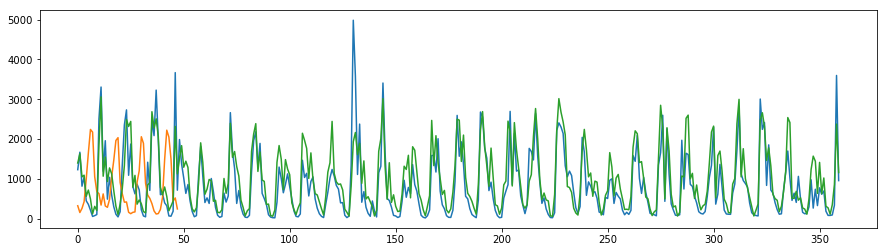

In [725]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
plt.plot(squamish_flux*2)
plt.plot(secondary_flux/10.)
plt.plot(howe_flux*1e9/86400/10);

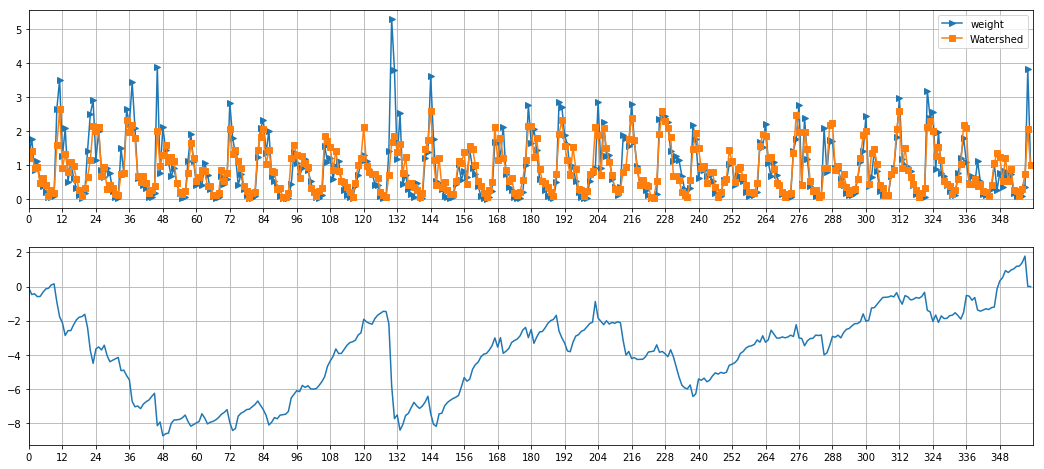

In [730]:
fig, axs = plt.subplots(2, 1, figsize=(18, 8))
axs[0].plot(weight_prediction, '>-', label='weight')
#axs[0].plot(weight_prediction2, '<-', label='weight secondary')
#plt.plot(linear_predictions,'+-', label='linear')
#plt.plot(mixed_predictions, 'o-', label='mixed')
#plt.plot(predictions2,'x-', label="with const")
axs[0].plot(howe_flux, 's-', label='Watershed')
#plt.plot(predictions3,'*-', label="1x and const")
#axs[0].plot(predictions4*upit,'o-', label="with Secondary")
#plt.plot(predictions5+x,'^-', label="1x Menton")
axs[0].legend()
axs[1].plot(np.cumsum(howe_flux - weight_prediction))
#axs[1].plot(np.cumsum(howe_flux - weight_prediction2))
#axs[1].plot(np.cumsum(howe_flux - predictions4*upit))
for ax in axs:
    ax.set_xticks(range(0, 360, 12))
    ax.grid()
    ax.set_xlim(0, 360);

The mixed does better in the lows and the total is correct for all of these.

[ 154.   86.   53.   25.   20.   14.    2.    5.    0.    0.    1.    0.]
[ 139.   95.   59.   36.   27.    4.    0.    0.    0.    0.    0.    0.]


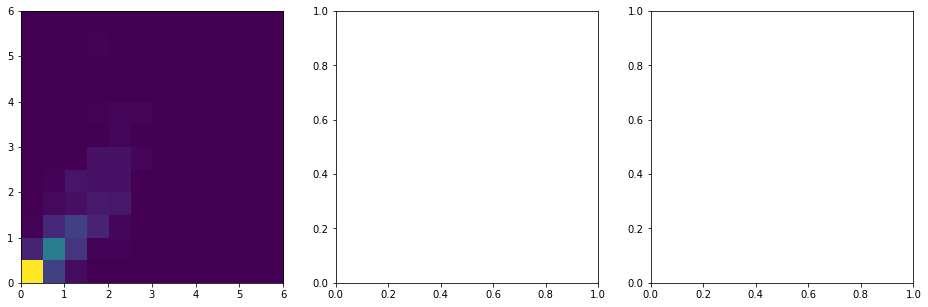

In [732]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]
fig, axs = plt.subplots(1, 3, figsize=(16, 5))
print(axs[0].hist2d(howe_flux, weight_prediction, bins=bins)[0].sum(axis=0));
#print(axs[1].hist2d(howe_flux, weight_prediction2, bins=bins)[0].sum(axis=0));
#print(axs[2].hist2d(howe_flux, (predictions4*upit), bins=bins)[0].sum(axis=0))
print(axs[0].hist2d(howe_flux, weight_prediction, bins=bins)[0].sum(axis=1))

In [733]:
myslope = alpha * slope + (1-alpha) * linear_slope
myintercept = ((1 - alpha) * linear_intercept / (365/12.))*1e9/86400
print (myintercept, myslope, slope)

64.3361494253 [ 19.81965516] 24.6047828461


(0, 4000)

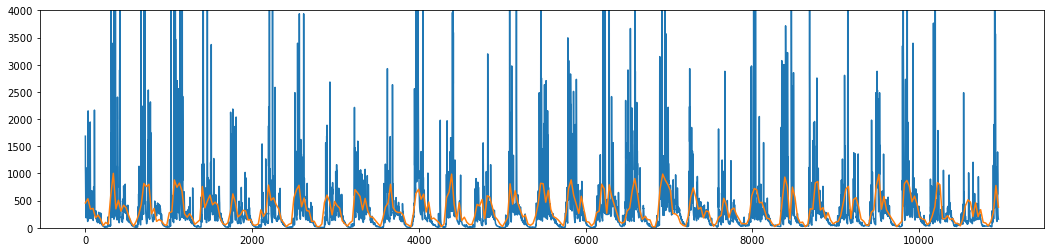

In [736]:
fig, ax = plt.subplots(1, 1, figsize=(18, 4))
xx = squamish_daily
xy = secondary_daily

#plt.plot(range(len(xx)), slope2 * xy)
#plt.plot(range(len(xx)),  (coeffs[0]*xx +  coeffs[1]*xy)*upit)
plt.plot(range(len(xx)), slope * xx)
plt.plot(np.arange(0, 30.5*len(mixed_predictions), 30.5), howe_flux/30.5*1e9/86400, label='Morrison')
plt.ylim(0, 4000)

In [707]:
print((coeffs[0]*upit, coeffs[1]*upit))

(14.576261277419361, 0.45626409936099821)


In [ ]:
### Homathko_Mouth for Bute.  Multiply by 2.015 or (61.17 + 1.785 x)
### Clowhom_ClowhomLake and Roberts_Roberts for Jervis. 8.810*Clowhom + 140.3*Roberts
### Squamish_Brackendale for Howe. Multiply by 2.276 or (89.00 + 1.893 x)
### SanJuan_PortRenfrew for JdF. Multiply by 8.501 or (32.837 + 7.801 x)
### Salmon_Sayward for EVI_N, Multiply by 10.334 or (152.15 + 7.859 x)
### Englishman for EVI_S, 24.60*Englishman   # looked at other rivers, but they are similar
### Theodosia and Homathko for Toba, 14.58*Theodosia + 0.4563*Homathko
### Skagit and Snohomish for Skagit, 1.267*Skagit + 1.236*Snohomish
### Nisqually and Greenwater for Puget, 8.790*Nisqually + 29.09*Greenwater

In [ ]:
bute_flux = np.zeros((2010-1970+1, 12))
for i, year in enumerate(range(1970, 2010+1)):
    morrison = pd.read_excel('Copy of Flow_Mon_X_Year.xlsx', sheetname=str(year))
    bute_flux[i, :] = morrison[morrison['Water Year'] == watershed].iloc[:, 4:16]

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
for i in range(12):
    ax.plot(np.arange(1970, 2010+1)+i/12.+1/12., bute_flux[:, i], '*');
monthly = squamish['flow'].resample('1M').mean()
ax.plot(monthly.index.year + (monthly.index.month)/12., monthly*30.5*86400/1e9*2, 'x-')
ax.set_xlim(2000, 2010)